In [1]:
import polars as pl
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [11]:
txt_directory = "dataset/txt/"
test_file = "dataset/txt/key.txt"

columns = []
column_names = []
for file_name in os.listdir(txt_directory):
    if file_name.endswith(".txt"):
        file_path = os.path.join(txt_directory, file_name)

        with open(file_path, 'r') as file:
            numbers = file.read().splitlines()
            
        column_name = file_name.split('.')[0]
        if column_name == "key": continue
        column_names.append(column_name)
        columns.append(pl.Series(column_name, [float(num) for num in numbers]))
df = pl.DataFrame(columns)

with open(test_file, 'r') as test_file:
    num = test_file.read().splitlines()
    test_numbers = [float(n) for n in num]

df_test = pl.DataFrame([test_numbers], schema=column_names, orient="row")
df_before = df[:0]
df_after = df[0:]

df_updated = pl.concat([df_before, df_test, df_after], how='vertical')
df_updated.write_csv('vibration_data.csv')
print("CSV file created successfully.")

CSV file created successfully.


In [ ]:
test_file = "dataset/txt/key.txt"

with open(test_file, 'r') as test_file:
    num = test_file.read().splitlines()
    test_numbers = [int(float(n)) for n in num]
df_test = pd.DataFrame(test_numbers, index=[i for i in columns])
df_test.to_csv('submission.csv')
print("CSV file created successfully.")

In [2]:
ww = pl.read_csv("vibration_data.csv", truncate_ragged_lines=True)
ww_pd = pd.read_csv("vibration_data.csv")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
values = ww_pd.to_numpy()

# Perform Fourier Transform
fourier_transform = np.fft.fft(values)
frequencies = np.fft.fftfreq(len(values))

# Plot original data
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(values, marker='o')
plt.title('Original Data')
plt.xlabel('Index (as proxy for time)')
plt.ylabel('Value')

# Plot Fourier Transform (magnitude spectrum)
plt.subplot(1, 2, 2)
half_len = len(frequencies) // 2  # Only plot the positive frequencies
plt.stem(frequencies[:half_len], np.abs(fourier_transform)[:half_len])
plt.title('Fourier Transform (Magnitude Spectrum)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

ValueError: could not broadcast input array from shape (54282408,) into shape (46876,)

Error in callback <function _draw_all_if_interactive at 0x0000023464AE5800> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [28]:
ww_pd[1:].describe()

,T0001,T0002,T0003,T0004,T0005,T0006,T0007,T0008,T0009,T0010,...,T1149,T1150,T1151,T1152,T1153,T1154,T1155,T1156,T1157,T1158
count,93752.000000,93752.000000,93752.000000,93752.000000,93752.000000,93752.000000,93752.000000,93752.000000,93752.000000,93752.000000,...,93752.000000,93752.000000,93752.000000,93752.000000,93752.000000,93752.000000,93752.000000,93752.000000,93752.000000,93752.000000
mean,0.562649,0.538310,0.580811,0.519710,0.728565,0.530741,0.716991,0.578981,0.666454,0.635223,...,0.517583,0.507719,0.729711,0.528209,0.625214,0.623125,0.587849,0.571983,0.530374,0.602246
std,1.193277,1.177032,1.209810,1.236111,1.349054,1.211930,1.280442,1.201669,1.168528,1.159734,...,1.221044,1.232783,1.322815,1.174138,1.155917,1.156478,1.217692,1.220504,1.229938,1.129399
min,-4.847744,-4.745233,-4.688946,-5.140456,-4.906907,-4.651571,-4.497039,-4.788403,-5.055912,-5.529928,...,-4.820702,-5.030711,-4.893835,-4.444885,-6.416641,-5.668512,-4.670797,-4.872811,-5.014090,-5.699553
25%,-0.236884,-0.251989,-0.237289,-0.313600,-0.181361,-0.289892,-0.155306,-0.234829,-0.107251,-0.118055,...,-0.310916,-0.323348,-0.166076,-0.260513,-0.129330,-0.132609,-0.233032,-0.253898,-0.293295,-0.132845
50%,0.560535,0.541219,0.578841,0.520667,0.727285,0.528281,0.721378,0.574214,0.673963,0.636857,...,0.524463,0.508606,0.729531,0.532032,0.624189,0.625852,0.590857,0.566532,0.528753,0.605210
75%,1.363884,1.326723,1.395700,1.355933,1.642759,1.348465,1.584866,1.394330,1.436186,1.392511,...,1.337414,1.339795,1.619445,1.312898,1.383145,1.379910,1.409345,1.393353,1.363076,1.344557
max,5.867965,5.902016,5.427506,5.624040,6.590848,5.443094,6.295352,5.841686,6.430971,6.407792,...,5.898288,6.056008,6.642374,5.604409,6.494850,6.118899,6.684421,6.368979,5.912483,6.977536


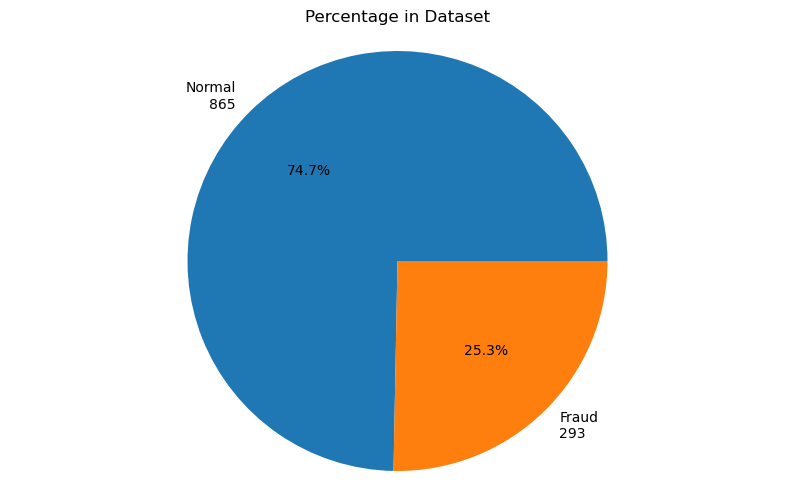

In [20]:
_, counts = np.unique(ww[0, :], return_counts=True)
normal_len = counts[0]
fraud_len = counts[1]
categories = [f'Normal\n{normal_len}', f'Fraud\n{fraud_len}']

counts = [normal_len, fraud_len]

plt.figure(figsize=(10, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%')
plt.title('Percentage in Dataset')
plt.axis('equal')
plt.show()